In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('record_playing_cards-v1128.csv')
df.head()

,game_id,player_id,is_dealer,on_dealer_team,player_win_lose,level_before,level_rounds_before,level_after,level_rounds_after,prime_suit,...,score_goal,score,dealer_win_lose,non_dealer_win_lose,level_up,lifetime_level_before,lifetime_level_after,year,month,day
0,1,Xu_Zhang,Yes,Yes,lose,2,1,2,1,none,...,120,150,lose,win,1,0,0,2020,11,7
1,1,Di_Wu,No,Yes,lose,2,1,2,1,none,...,120,150,lose,win,1,0,0,2020,11,7
2,1,Zheng_Li,No,Yes,lose,2,1,2,1,none,...,120,150,lose,win,1,0,0,2020,11,7
3,1,Minghai_Qin,No,No,win,2,1,3,1,none,...,120,150,lose,win,1,0,1,2020,11,7
4,1,Shaohe_Wang,No,No,win,2,1,3,1,none,...,120,150,lose,win,1,0,1,2020,11,7


In [27]:
player_list = df.player_id.unique().tolist()

In [45]:
# Utility functions
def get_winning_rate(df, player):
    '''calculate the winning rate of the specified player'''
    df_player = df[df.player_id == player]
    df_player_win = df_player[df_player.player_win_lose == 'win']
    winning_rate = len(df_player_win) / len(df_player)
    return winning_rate

def get_n_games(df, player):
    '''calculate the number of games played by the specified player'''
    df_player = df[df.player_id == player]
    return len(df_player)

def get_dealer_winning_rate_at_n_decks(df, n_decks):
    '''calculate the dealer's winning rate of the specified n_decks'''
    df_n_decks = df[df.n_decks == n_decks]
    if len(df_n_decks) > 0:
        df_selected = df[(df.n_decks == n_decks) & (df.dealer_win_lose == 'win')]
        winning_rate = df_selected.game_id.nunique() / df_n_decks.game_id.nunique()
        return winning_rate
    else:
        return 'na'


In [54]:
n_decks_list = list(range(3, df.n_decks.max()+1))
# n_decks
dealer_winning_rates = []
for n_decks in n_decks_list:
    dealer_winning_rates.append(get_dealer_winning_rate_at_n_decks(df, n_decks))

In [55]:
dealer_winning_rates

[0.4, 0.42105263157894735, 0.42857142857142855, 0.42857142857142855, 0.75]

<AxesSubplot:>

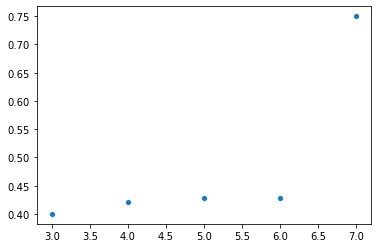

In [56]:
sns.scatterplot(n_decks_list, dealer_winning_rates)

In [44]:
n_decks=4
df_selected = df[(df.n_decks == n_decks) & (df.dealer_win_lose == 'win')]
df_selected.game_id.nunique()

8

In [29]:
for player in player_list:
    n_games = get_n_games(df, player)
    winning_rate = get_winning_rate(df, player)
    print(player, 'has played', n_games,
          'games with a winning rate of',
          "{:.2%}".format(winning_rate)+'.')

Xu_Zhang has played 42 games with a winning rate of 30.95%.
Di_Wu has played 47 games with a winning rate of 40.43%.
Zheng_Li has played 45 games with a winning rate of 48.89%.
Minghai_Qin has played 47 games with a winning rate of 57.45%.
Shaohe_Wang has played 47 games with a winning rate of 57.45%.
Qingzhi_Liu has played 39 games with a winning rate of 53.85%.
Qin_Peng has played 9 games with a winning rate of 88.89%.
Hai_Yang has played 26 games with a winning rate of 42.31%.
Yanni_Lin has played 14 games with a winning rate of 64.29%.
Sibo_Tao has played 5 games with a winning rate of 80.00%.
Yangbin_Gao has played 4 games with a winning rate of 0.00%.


In [38]:
df.groupby('dealer_win_lose').describe()['game_id']

,count,mean,std,min,25%,50%,75%,max
dealer_win_lose,,,,,,,,
lose,176.0,25.142045,14.347812,1.0,12.0,28.0,38.0,47.0
win,149.0,27.899329,12.841416,5.0,17.0,27.0,41.0,46.0


In [36]:
df.groupby('game_id')

In [57]:
SHEET_URL = 'https://docs.google.com/spreadsheets/d/1So3PBr9gV3I0LzApZOgJlQew2QjM1wAiWhR50rAnHRg/edit?ts=5fb9dddf#gid=2137801449'

In [76]:
SHEET_URL.split('/')[5]

'1So3PBr9gV3I0LzApZOgJlQew2QjM1wAiWhR50rAnHRg'

In [58]:
import re

In [72]:
a = 'abc111'
result = re.match('[a-z]+', a)
result[0]

'abc'

In [75]:
# prog = re.compile('/spreadsheets/d/([a-zA-Z0-9-_]+)')
result = re.match('.*/spreadsheets/d/([a-zA-Z0-9-_]+)', SHEET_URL)
result

<re.Match object; span=(0, 83), match='https://docs.google.com/spreadsheets/d/1So3PBr9gV>

In [ ]:
import pandas as pd
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']
SPREADSHEET_ID = 'spreadsheet_url_ID'
RANGE_NAME = 'spreadsheet_tab_name!'
data = pull_sheet_data(SCOPES,SPREADSHEET_ID,RANGE_NAME)
df = pd.DataFrame(data[1:], columns=data[0])
df